# PHYS381 Assignment 1

## 1 Potential energy and stable equilibrium

### 1.1 The bisection method for finding roots of a function

### 1.2 Numerical accuracy in scientific computing

## 2 Python scripting

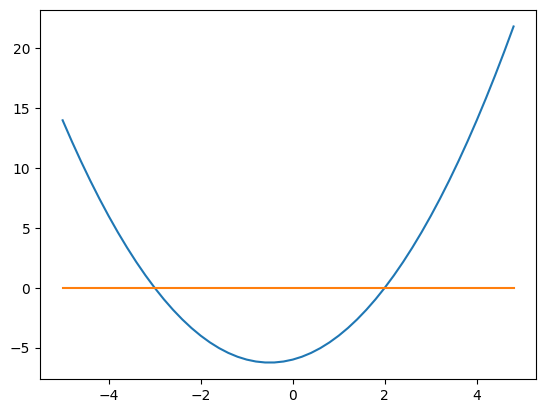

In [35]:
# Importing matplotlib liabrary for plotting the graph.
import matplotlib.pylab as plt
# Importing numpy liabrary.
import numpy as np
# Setting the value for the quadratic function coeffiecients.
a = 1
b = 1
c = -6
# Creating a range of x values from -5 to 5 with a step of 0.2 .
x = np.arange(-5.0, 5.0, 0.2)
# Plotting the quadratic function.
plt.plot(x, a * x * x + b * x + c)
# Plotting the x-axis
plt.plot(x, 0.0 * x)
# Showing the graph.
plt.show()

## 3 Python script to find the roots of a parabolic function

Define a function to analytically find a functions root between two points using the bisection method

In [36]:
#Assumes valid input [func(x1) < 0, func(x3) > 0, tolerance >= 0]
#Returns [root, n_steps]
def bisection_root_finder(func, x1, x3, tolerance, verbose = True):
    
    #Check unique cases:
    #Checking for x1 to see if it is greater than zero 
    if(func(x1) > 0): 
        print('f(x1) must be greater than 0.')
        return None, 0
    
    #Checking for x3 to see if it is greater than zero
    if(func(x3) < 0):
        print('f(x3) must be less than 0.')
        return None, 0
    
    #Checking if x1 or x3 is a root
    if(func(x1) == 0): return x1, 0
    if(func(x3) == 0): return x3, 0

    #Calculating the mid-point of x1 and x3
    x2 = (x1 + x3) / 2.0
    #Calculating the function f(x2).
    fx2 = func(x2)
    
    n_steps = 0
    #As long as the absolute value of the function (x2) is greater than the tolerance value, the loop should continue.
    while(abs(fx2) > tolerance):
        #If it is true
        if(verbose): 
            #Printing the function values at x1, x2 and x3.
            print(f'func({x1}) = {func(x1)} | func({x2}) = {func(x2)} | func({x3}) = {func(x3)}')
        # In the case that the functuion f(x2) is less than zero, x1 is assigned to x2
        if(fx2 < 0): x1 = x2
        # If the case is different such as x2 is greater than zero, then x3 is assigned to x2.
        else: x3 = x2 
        
        x2 = (x1 + x3) / 2.0
        fx2 = func(x2)

        n_steps += 1
    #Calculating the final value of x2 and the number of steps taken to reach here.    
    return x2, n_steps

Define a porabola

In [37]:
#Defining the function parabola
def porabola(x):
    #Setting the equation of the parabola
    return (2 * x*x) + (3 * x) - 1

Plot porabola

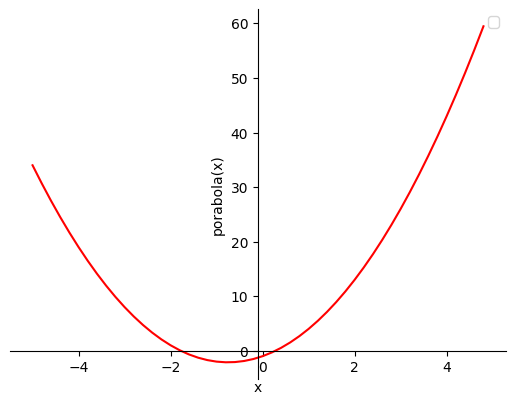

In [38]:
def plot_function(func, x_start, x_fin, step, x_label, y_label, color='r', negate=False, handles_in=[]):
    
    x = np.arange(x_start, x_fin, step)
    if negate: y = [-func(x_i) for x_i in x]
    else: y = [func(x_i) for x_i in x]

    #Referenced:  https://scriptverse.academy/tutorials/python-matplotlib-plot-function.html

    # setting the axes at the centre
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    ax.legend(handles=handles_in)
    

    # plot the function
    plt.plot(x,y,color)

plot_function(porabola,-5,5,0.2, 'x', 'porabola(x)')

# show the plot
plt.show()


Use our root finder on this porabola

In [39]:
#Setting the variables a value
root1_x1 = 0
root1_x3 = 1

root2_x1 = -1.5
root2_x3 = -2
#Setting a value to the tolerance
tolerance = 0.0001

print('Root 1: ')
root1, _ = bisection_root_finder(porabola, root1_x1, root1_x3, tolerance)

print('\nRoot 2:')
root2, _ = bisection_root_finder(porabola, root2_x1, root2_x3, tolerance)


print(f'\nRoot 1 = {root1} [+\-] {tolerance} | Root 2 = {root2} [+\-] {tolerance}')


Root 1: 
func(0) = -1 | func(0.5) = 1.0 | func(1) = 4
func(0) = -1 | func(0.25) = -0.125 | func(0.5) = 1.0
func(0.25) = -0.125 | func(0.375) = 0.40625 | func(0.5) = 1.0
func(0.25) = -0.125 | func(0.3125) = 0.1328125 | func(0.375) = 0.40625
func(0.25) = -0.125 | func(0.28125) = 0.001953125 | func(0.3125) = 0.1328125
func(0.25) = -0.125 | func(0.265625) = -0.06201171875 | func(0.28125) = 0.001953125
func(0.265625) = -0.06201171875 | func(0.2734375) = -0.0301513671875 | func(0.28125) = 0.001953125
func(0.2734375) = -0.0301513671875 | func(0.27734375) = -0.014129638671875 | func(0.28125) = 0.001953125
func(0.27734375) = -0.014129638671875 | func(0.279296875) = -0.00609588623046875 | func(0.28125) = 0.001953125
func(0.279296875) = -0.00609588623046875 | func(0.2802734375) = -0.0020732879638671875 | func(0.28125) = 0.001953125

Root 2:
func(-1.5) = -1.0 | func(-1.75) = -0.125 | func(-2) = 1
func(-1.75) = -0.125 | func(-1.875) = 0.40625 | func(-2) = 1
func(-1.75) = -0.125 | func(-1.8125) = 0.

Display our found roots on the plot to see if it is accurate

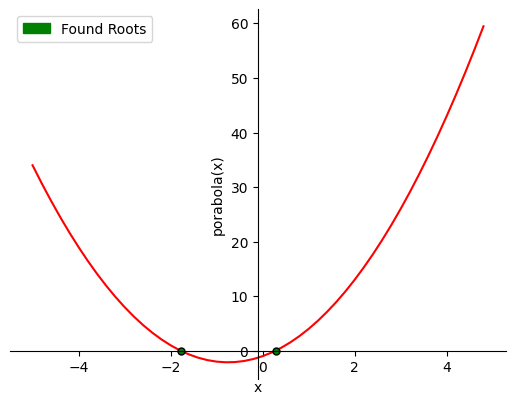

In [49]:
#To add multiple lables to plot
import matplotlib.patches as mpatches

green_func = mpatches.Patch(color='green', label='Found Roots')    
plot_function(porabola,-5,5,0.2, 'x', 'porabola(x)', handles_in=[green_func])

#setting 
plt.plot(root1, porabola(root1), marker="o", markersize=5, markeredgecolor="black", markerfacecolor="green")
plt.plot(root2, porabola(root2), marker="o", markersize=5, markeredgecolor="black", markerfacecolor="green")

#show plot
plt.show()

Plot n_steps as a function of tolerance

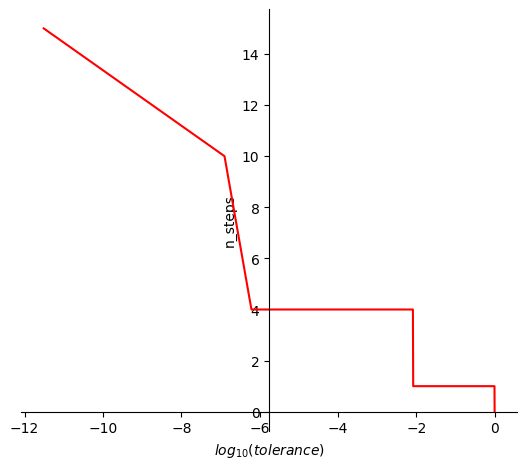

In [41]:
x = np.linspace(1,0.00001, 1000)
y = [bisection_root_finder(porabola, root1_x1, root1_x3, tolerance, verbose=False)[1] for tolerance in x]

#Referenced:  https://scriptverse.academy/tutorials/python-matplotlib-plot-function.html

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.ylabel('n_steps')
plt.xlabel(r'$log_{10}(tolerance)$')

# plot the function
plt.plot(np.log(x),y, 'r')

plt.subplots_adjust(bottom=0.0015)

# show plot
plt.show()

## 4 The Newton-Raphson method for finding roots of a funcion

Plot porabola and its first derivative

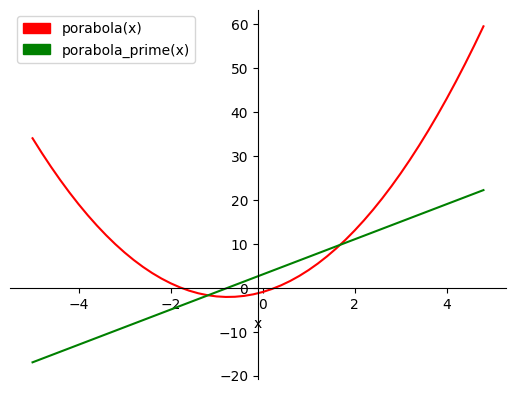

In [42]:


#Defining the function parabola_prime
def porabola_prime(x):
    #Setting the equation of the function
    return 4*x + 3

x = np.arange(-5.0, 5.0, 0.2)
#Setup y to be f(x) for each x
y = [porabola(x_i) for x_i in x]

#Referenced:  https://scriptverse.academy/tutorials/python-matplotlib-plot-function.html

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.xlabel('x')

# plot the function
plt.plot(x,y, 'r')

y = [porabola_prime(x_i) for x_i in x]

plt.plot(x,y, 'g')

red_func = mpatches.Patch(color='red', label='porabola(x)')
green_func = mpatches.Patch(color='green', label='porabola_prime(x)')

ax.legend(handles=[red_func, green_func])

plt.show()

Plot points as we look for root using the Newton-Raphson method

1
0.4285714285714286
0.29004329004329
0.28081769080728497
0.2807764072311384


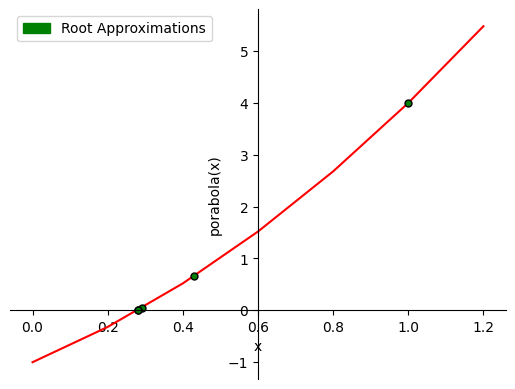

In [43]:
#Implementing the newton-raphson method
def newton_root_finder(func, func_prime, x, tol, verbose = True):
    #Setting up a list of points that hold our 'guesses' at each iteration, to later show on the plot 
    points = []
    
    points.append(x)
    if verbose: print(x)
    
    #Iteratate on newtons method until the function evaluated at our current 'guess'
    while abs(func(x)) > tolerance:    
        x = x - (func(x) / func_prime(x)) #x_(n+1) = x_n - f(x_n)/f'(x_n)
        
        points.append(x)
        if verbose: print(x)
        
    return x, points
    
#Search for root
root, points = newton_root_finder(porabola, porabola_prime, 1, 0.0001)

green_func = mpatches.Patch(color='green', label='Root Approximations')    
plot_function(porabola,0,1.25,0.2, 'x', 'porabola(x)', handles_in=[green_func])


#Add all of the iterative 'guesses' to the plot
for point in points:
    plt.plot(point, porabola(point), marker="o", markersize=5, markeredgecolor="black", markerfacecolor="green")


plt.show()


Find other root

-1.7
-1.7842105263157895
-1.78078210794161


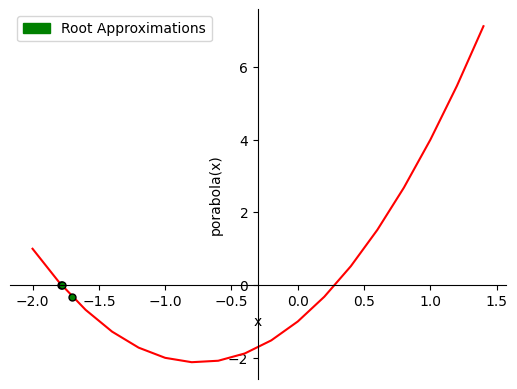

In [44]:
#Search for root
root, points = newton_root_finder(porabola, porabola_prime, -1.7, 0.0001)

#Add label to explain the green points
green_func = mpatches.Patch(color='green', label='Root Approximations')    
#Plot the original function to show how newtons method collapses to the correct answer
plot_function(porabola,-2,1.5,0.2, 'x', 'porabola(x)', handles_in=[green_func])

#Add all of the iterative 'guesses' to the plot
for point in points:
    plt.plot(point, porabola(point), marker="o", markersize=5, markeredgecolor="black", markerfacecolor="green")


plt.show()

## 5 Python script to find the minima of a potential energy function

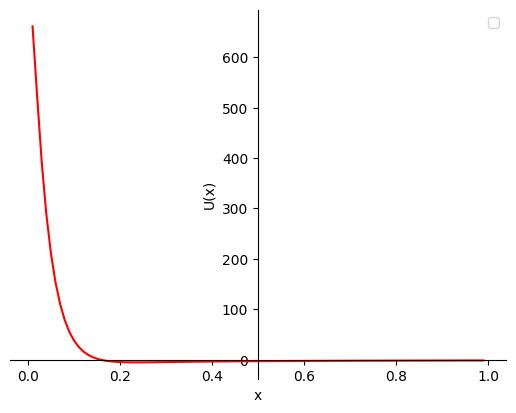

In [45]:
#importing the library math
import math

term1 = 1.44 # e^2 / (4 pi epsilon naught) | eV nm
A = 1090 #eV
p = 0.033 #nm

#Define potential energy func
def U(x):
    return (A * math.exp(-x / p)) - (term1 / x)

plot_function(U, 0.01, 1, 0.01, 'x', 'U(x)')

plt.show()

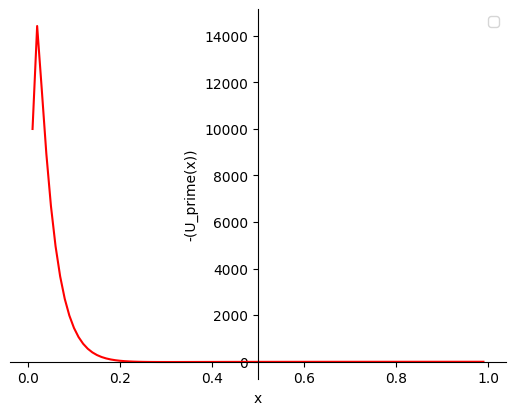

In [46]:
#Define first derivative of U(x)
def U_prime(x):
    return (term1 * (1 / x**2)) - ((A / p) * math.exp(-x/p))

#Plot U'(x)
plot_function(U_prime, 0.01, 1, 0.01, 'x', '-(U_prime(x))', negate=True)

#Define second derivative of U(x)
def U_prime_prime(x):
    return ((A / p**2) * math.exp(-x / p)) - (2* term1 * (1 / x**3))


-dU/dx is zero at the minimum of U(x) because dU/dx represents the slope of U(x) at each point, and at the minimum the slope is zero. 

0.2
0.22078813846653805
0.23257256126698142
0.23584056274261325
0.23605300667266615
0.2360538484026252


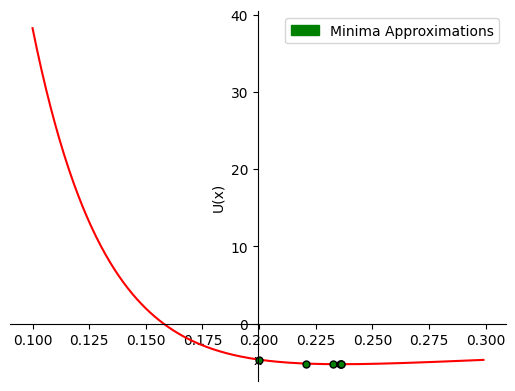

In [47]:
#Find root of U_prime(x), which will collapse to the minimum of U(x)
root, points = newton_root_finder(U_prime, U_prime_prime, 0.2, 0.0001)

green_func = mpatches.Patch(color='green', label='Minima Approximations')    
#Plot U(x)
plot_function(U,0.1,0.3,0.001, 'x', 'U(x)', handles_in=[green_func])

#Add our 'guesses' throughout this run of newtons method to the plot.
for point in points:
    plt.plot(point, U(point), marker="o", markersize=5, markeredgecolor="black", markerfacecolor="green")
    
plt.show()

## 6 Report writing guide